# Satellite Image Processing using Python Programming (IPYNB) and GDAL

In this Notebook, we will use Geospatial Data Abstraction Library with Python Programming Language to analyze Satellite Images using different modules, such as: Numpy, Matplotlib, Scikit-Image and Sklearn.

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from osgeo import gdal

In this Notebook, we will first upload an Image that has been captured by Landsat 8 Earth Observation Satellite which captures the scene of New York and its surrounding areas. For our analysis, we will use GDAL (Geospatial Data Abstraction Library). In our first step, we will load the Data that we possess using open() function.

In [4]:
data = gdal.Open('nyc.tif', gdal.GA_ReadOnly)
print(data)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8bdf4a5900> >


Now we have our image loaded, we will use Raster to explore some of the attributes of our Dataset.

In [5]:
num_bands = data.RasterCount
print('The number of spectral bands in the image: {x}\n'.format(x=num_bands))

The number of spectral bands in the image: 7



In [6]:
row = data.RasterYSize
col = data.RasterXSize
print('The size of the image is: {r} rows x {c} columns\n'.format(r=row, c=col))

The size of the image is: 2509 rows x 3017 columns



In [7]:
desc = data.GetDescription()
meta = data.GetMetadata()
print('Raster file description: ')
print(desc)
print('\n')
print('Raster metadata:')
print(meta)
print('\n')

Raster file description: 
nyc.tif


Raster metadata:
{'AREA_OR_POINT': 'Area', 'DataType': 'Generic'}




In [8]:
driver = data.GetDriver()
print('The image format driver used to open the raster file: {d}\n'.format(d=driver.ShortName))

The image format driver used to open the raster file: GTiff



In [9]:
proj = data.GetProjection()
print('Image projection:')
print(proj + '\n')

Image projection:
PROJCS["WGS 84 / UTM zone 18N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-75],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32618"]]



The Geo Transform function will generate a set of six numbers that will provide the information between the pixels and projected coordinate system, in X versus Y dimensions. 

In [12]:
gt = data.GetGeoTransform()
print('Image geo-transform: {gt}\n'.format(gt=gt))

Image geo-transform: (515685.0, 30.0, 0.0, 4538505.0, 0.0, -30.0)



In [13]:
blue = data.GetRasterBand(2)
print(blue)
nodata = blue.GetNoDataValue()
print("NoData value of pixels: ")
print(nodata)

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f8bc7d36f60> >
NoData value of pixels: 
0.0


In [14]:
dt = blue.DataType
print('Band datatype: {d}'.format(d=dt))

Band datatype: 2


In [15]:
datatype_name = gdal.GetDataTypeName(dt)
print('Band datatype: {t}'.format(t=datatype_name))

Band datatype: UInt16


In [16]:
bytes = gdal.GetDataTypeSize(dt)
print('Band datatype size: {b} bytes\n'.format(b=bytes))

Band datatype size: 16 bytes



In [17]:
band_min, band_max, band_mean, band_stddev = blue.GetStatistics(0, 1)
print('Band range: {minimum} to {maximum}'.format(minimum=band_min,
                                                 maximum=band_max))
print('Band mean, standard deviation: {m}, {s}\n'.format(m=band_mean, s=band_stddev))

Band range: 5112.0 to 47508.0
Band mean, standard deviation: 8134.840973348869, 764.9094578739595



In [18]:
blue_data = blue.ReadAsArray()
print(blue_data)
print('\n')
print('Blue band mean is: {m}'.format(m=blue_data.mean()))
print('Size is: {sz}'.format(sz=blue_data.shape))

[[   0    0    0 ...    0    0    0]
 [7869 7858 7921 ... 8073 8504 7958]
 [7845 7827 7896 ... 8624 8159 7879]
 ...
 [7760 7766 7949 ... 7744 7736 7749]
 [7750 7792 8059 ... 7725 7734 7743]
 [   0    0    0 ...    0    0    0]]


Blue band mean is: 8128.356444872704
Size is: (2509, 3017)


### Let's visualize the Blue Spectral Band of our Image:

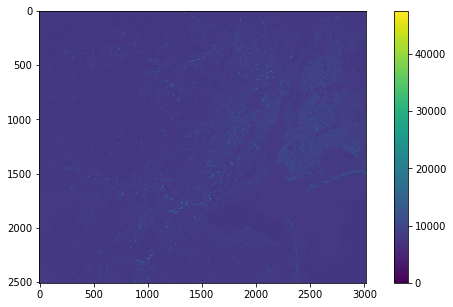

In [19]:
plt.figure(figsize=(10,5))
plt.imshow(blue_data)
plt.colorbar()

Now we will input all our bands into a single 3-D Array generated by Numpy which then we can read and analyze.

In [0]:
image = np.zeros((data.RasterYSize, data.RasterXSize, data.RasterCount))
for b in range(data.RasterCount):
    band = data.GetRasterBand(b + 1)
    image[:, :, b] = band.ReadAsArray()

In [21]:
img = image[5:2505, 4:3014, :]
print(img)
print(img.dtype)
print(img.shape)

[[[ 8495.  7749.  7064. ... 11485.  9793.  7414.]
  [ 8512.  7788.  7039. ... 11428.  9856.  7497.]
  [ 8498.  7769.  7038. ... 11512.  9819.  7441.]
  ...
  [ 8454.  7640.  6876. ... 11950.  8747.  6553.]
  [ 8472.  7688.  6950. ... 11636.  9189.  6820.]
  [ 8439.  7669.  6896. ... 11117.  8632.  6737.]]

 [[ 8517.  7767.  7037. ... 10601.  9602.  7514.]
  [ 8524.  7785.  7023. ... 10444.  9717.  7584.]
  [ 8514.  7778.  7009. ... 10236.  9745.  7642.]
  ...
  [ 8449.  7652.  6833. ... 12271.  8561.  6444.]
  [ 8433.  7650.  6871. ... 12376.  8706.  6468.]
  [ 8478.  7646.  6844. ... 12457.  8691.  6483.]]

 [[ 8542.  7776.  7009. ...  9991.  9464.  7540.]
  [ 8538.  7795.  7022. ... 10018.  9905.  7692.]
  [ 8528.  7785.  7025. ... 10072. 10025.  7730.]
  ...
  [ 8452.  7628.  6832. ... 12788.  9012.  6515.]
  [ 8485.  7710.  6998. ... 13965.  9513.  6809.]
  [ 8575.  7783.  7102. ... 14147.  9417.  6932.]]

 ...

 [[ 8617.  7834.  7141. ... 13599. 10041.  7358.]
  [ 8852.  8094.  74

### Now calculating Spectral Index 

Here we will use Normalized Difference Vegetation Index (NDVI) to assess the area of live vegetation which is reflected on the Near Infrared band of the spectrum.

In [22]:
print('Red band mean: {r}'.format(r=img[:, :, 3].mean()))
print('NIR band mean: {nir}'.format(nir=img[:, :, 4].mean()))

Red band mean: 6933.985118405316
NIR band mean: 10383.650571960134


In [23]:
b_red = 3
b_nir = 4
ndvi = (img[:, :, b_nir] - img[:, :, b_red]) / \
        (img[:, :, b_nir] + img[:, :, b_red]).astype(np.float64)

print('NDVI matrix: ')
print(ndvi)

print('\nMax NDVI: {m}'.format(m=ndvi.max()))
print('Mean NDVI: {m}'.format(m=ndvi.mean()))
print('Median NDVI: {m}'.format(m=np.median(ndvi)))
print('Min NDVI: {m}'.format(m=ndvi.min()))

NDVI matrix: 
[[ 0.26340685  0.26102069  0.26554169 ...  0.30487006  0.28987917
   0.27196796]
 [ 0.230671    0.22481529  0.21344319 ...  0.32867739  0.3290378
   0.33601459]
 [ 0.20555053  0.20517293  0.2059387  ...  0.34179739  0.37308884
   0.37216295]
 ...
 [ 0.35765986  0.36858795  0.34429382 ... -0.04383246 -0.04397943
  -0.04396384]
 [ 0.31857446  0.41176471  0.3318472  ... -0.04578527 -0.04343972
  -0.04272446]
 [ 0.31891777  0.42239894  0.36312959 ... -0.04358611 -0.04350908
  -0.04393953]]

Max NDVI: 0.5953346855983773
Mean NDVI: 0.17906873938996884
Median NDVI: 0.21698360930946356
Min NDVI: -0.27782387104421


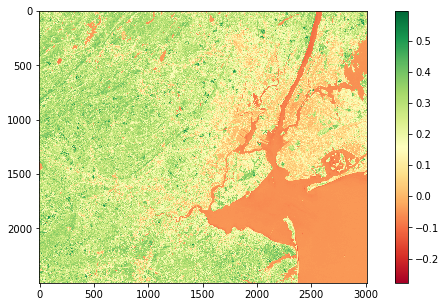

In [24]:
plt.figure(figsize=(10,5))
plt.imshow(ndvi, cmap = 'RdYlGn')
plt.colorbar()

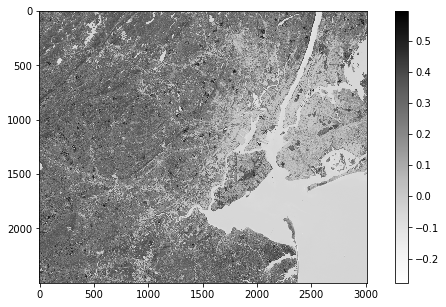

In [25]:
plt.figure(figsize=(10,5))
plt.imshow(ndvi, cmap = plt.cm.Greys)
plt.colorbar()

### Multi-Spectral Image Plotting

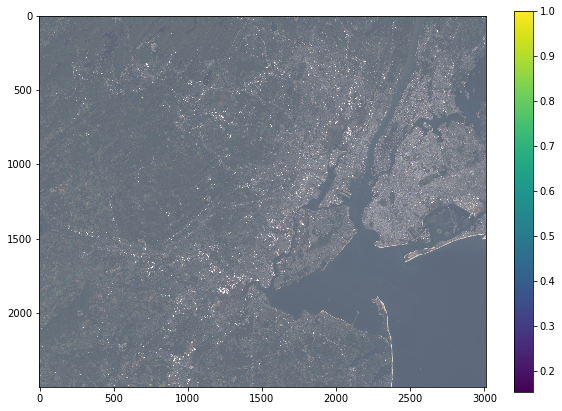

In [26]:
index = np.array([3, 2, 1])
colors = img[:, :, index].astype(np.float64)

max_val = 16000
min_val = 0
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
plt.figure(figsize=(10,7))
plt.imshow(colors)
plt.colorbar()

### Highlighting Urban and Built-Up Land Areas

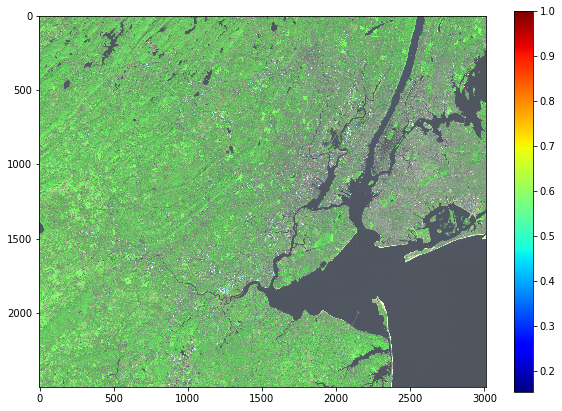

In [27]:
index = np.array([6, 4, 3])
colors = img[:, :, index].astype(np.float64)

max_val = 16000
min_val = 0
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[2]):
    colors[:, :, b] = colors[:, :, b] * 1 / (max_val - min_val)
plt.figure(figsize=(10,7))
plt.imshow(colors, cmap = 'jet')
plt.colorbar()

### Using Unsupervised Learning to classify Green Vegetation, Urban built-up land, and Water. 

(300, 300, 3)
<class 'numpy.uint8'>


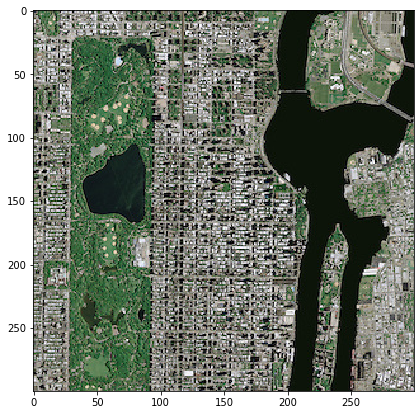

In [33]:
from skimage import io

train_classes = {'green': 0, 'building': 1, 'water': 2}
num_classes = len(train_classes)
mapping = np.uint8([[0, 255, 0], [255, 0, 0], [0, 0, 255]])

im = io.imread('download.png')
row, col, num_bands = im.shape
plt.figure(figsize=(10,7))
plt.imshow(image_file)
print(image_file.shape)
print(type(image_file[0,0,0]))

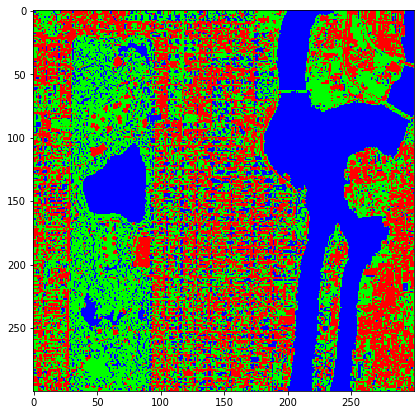

In [37]:
from sklearn.cluster import KMeans
X_features = im.reshape(row*col, num_bands)
model = KMeans(n_clusters=num_classes, random_state=0).fit(X_features)
unsup_class = model.labels_.reshape(row, col)
plt.figure(figsize=(10,7))
plt.imshow(mapping[unsup_class])

# END